## Explore the Project on GitHub

For more details, source code, and updates, please visit the project's GitHub repository. Click on the image below to be redirected.


[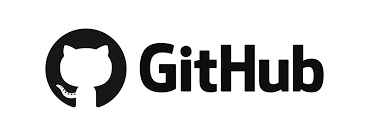](https://github.com/ElDEEB21/Netflix-Analytics)


## Required Libraries
Importing libraries for data analysis and visualization: NumPy, Pandas, Matplotlib, Seaborn.


In [172]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading and Exploration
Load Netflix dataset, view structure, summarize, check nulls, duplicates, and data types.


In [173]:
df = pd.read_csv("netflix1.csv")
df.shape

(8790, 10)

In [174]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [175]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [176]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [177]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [179]:
df.duplicated().sum()

0

In [180]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

## Data Cleaning
Rename columns, and summarize the data.


In [181]:
df.rename(columns={'date_added': 'Date',"listed_in":"category"},inplace=True)

In [182]:
df.head()

,show_id,type,title,director,country,Date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [183]:
df['Date'] = pd.to_datetime(df['Date'])

In [184]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


## Visualization of Show Types
Plotting a pie chart to illustrate the proportion of Movies vs. TV Shows in the dataset.


In [185]:
typeOfShow = df['type'].value_counts().reset_index()
typeOfShow

,type,count
0,Movie,6126
1,TV Show,2664


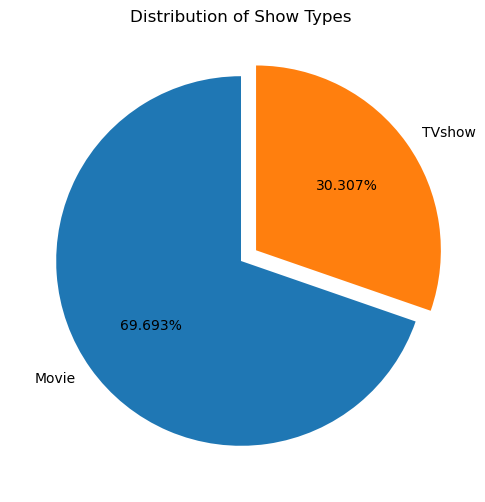

In [186]:
plt.figure(figsize=(20, 6))  
plt.pie(typeOfShow['count'], labels=['Movie', 'TVshow'],
        autopct='%1.3f%%', explode=[0, 0.1], startangle=90)
plt.title('Distribution of Show Types')
plt.show()

## Analysis of Director Contributions
Calculate the number of unique directors, and visualize their distribution along with a bar chart showcasing the top 10 directors by number of titles directed.


In [187]:
numOfDirectors = df['director'].value_counts()
numOfDirectors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [188]:
given_directors = numOfDirectors.sum() - numOfDirectors[0]
print(f'Num of given directors is {given_directors}')

Num of given directors is 6202


In [189]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=['Given directors', 'Not given directors'],
                             values=[numOfDirectors[0], given_directors],
                             title='Distribution of directors',
                             marker=dict(colors=['darkblue', 'darkred']))])
fig.show()

In [190]:
numOfDirectorMovies = df.groupby(['director', 'type'])[
    'director'].value_counts().reset_index().head(10)
numOfDirectorMovies

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


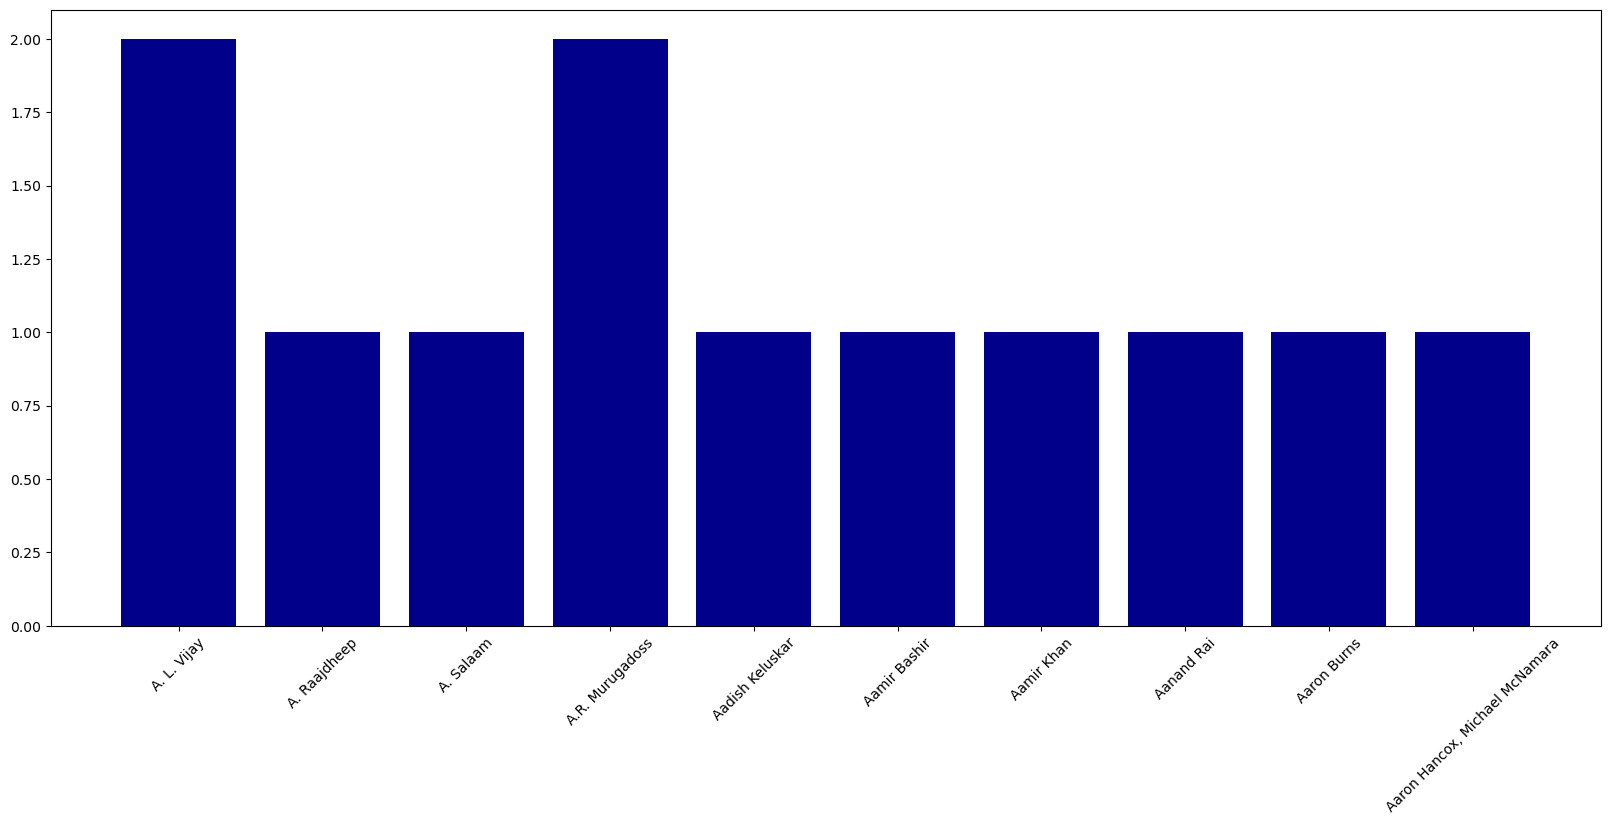

In [191]:
plt.figure(figsize=(20, 8))
plt.bar(numOfDirectorMovies['director'],
        numOfDirectorMovies['count'], color='darkblue')
plt.xticks(rotation=45)
plt.show()

## Top Content-Producing Countries
Visualizing the top 10 countries by number of Netflix titles using a bar chart.


In [192]:
country = df['country'].value_counts().reset_index(
).sort_values(by='count', ascending=False).head(10)
country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


Text(0, 0.5, 'Num of Movies')

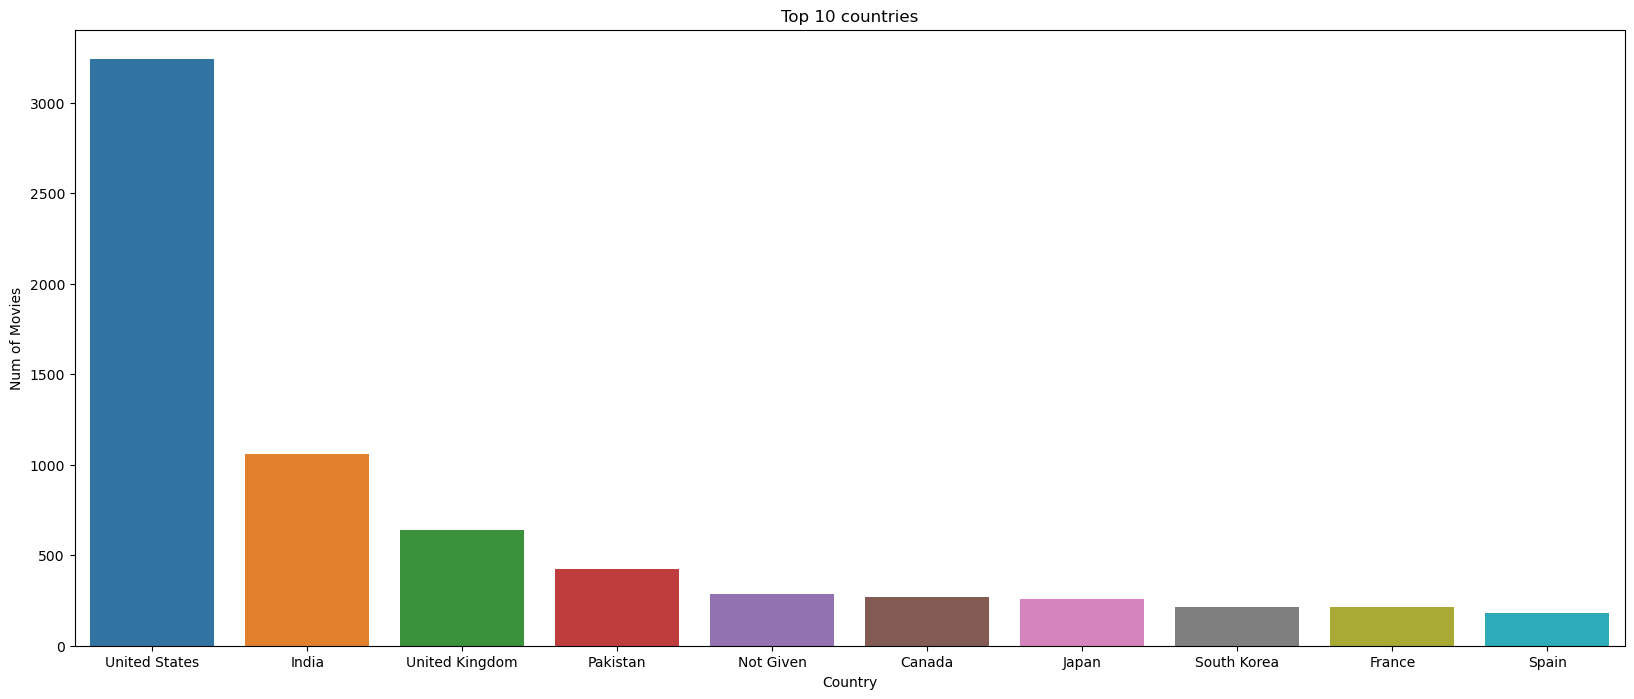

In [193]:
plt.figure(figsize=(20, 8))
plt.title('Top 10 countries')
sns.barplot(x='country', y='count', data=country)
plt.xlabel('Country')
plt.ylabel('Num of Movies')

## Release Year Distribution
Histogram showing the frequency of titles released across different years.


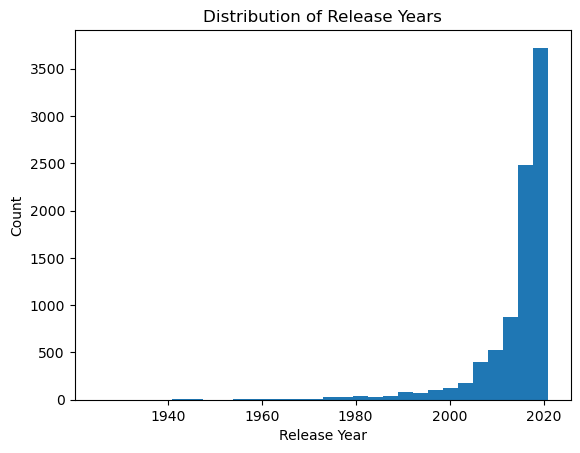

In [194]:
df['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

## Rating Distribution for Movies and TV Shows
Bar charts displaying the top 10 ratings for Movies and TV Shows, highlighting their frequency in the dataset.


In [195]:
rates = df.groupby(['rating', 'type'])['type'].value_counts().reset_index()
rates

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [196]:
top10Movie = rates[rates['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top10Movie

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


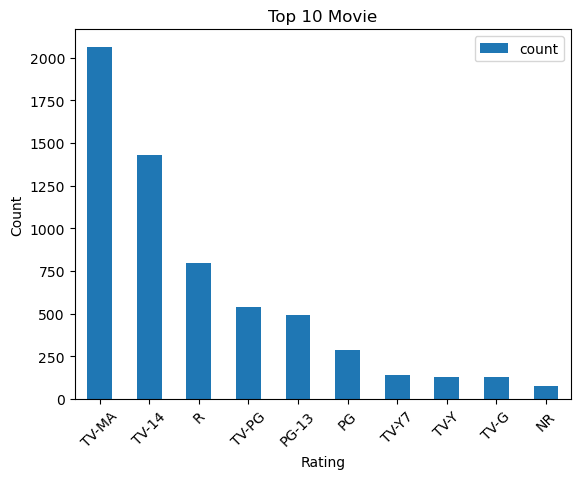

In [197]:
top10Movie.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 Movie')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [198]:
top10TvShow = rates[rates['type'] == 'TV Show'].sort_values(
    by='count', ascending=False).iloc[0:10]
top10TvShow

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


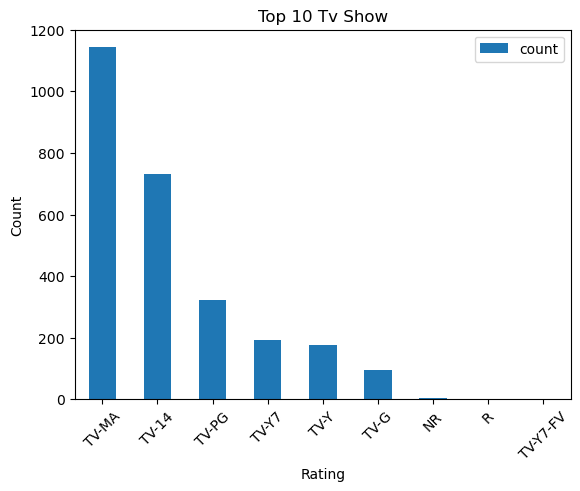

In [199]:
top10TvShow.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 Tv Show')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Popular Genres for Movies and TV Shows
Bar charts showing the top 10 most popular genres for Movies and TV Shows, based on the number of titles in each genre.


In [200]:
category = df.groupby(['category', 'type'])['category'].value_counts().reset_index()
category

,category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [201]:
top10ListedGenresMovie = category[category['type'] == 'Movie'].sort_values(
    by='count', ascending=False).iloc[0:10]
top10ListedGenresMovie

,category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


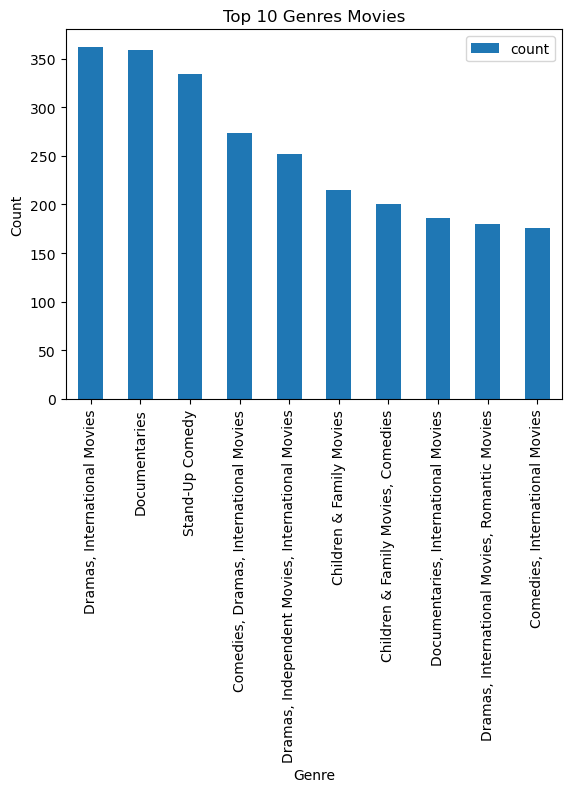

In [202]:
top10ListedGenresMovie.plot(x='category', y='count', kind='bar')
plt.title('Top 10 Genres Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [203]:
top10ListedGenresTvShow = category[category['type'] == 'TV Show'].sort_values(
    by='count', ascending=False).iloc[0:10]
top10ListedGenresTvShow

,category,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,121
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


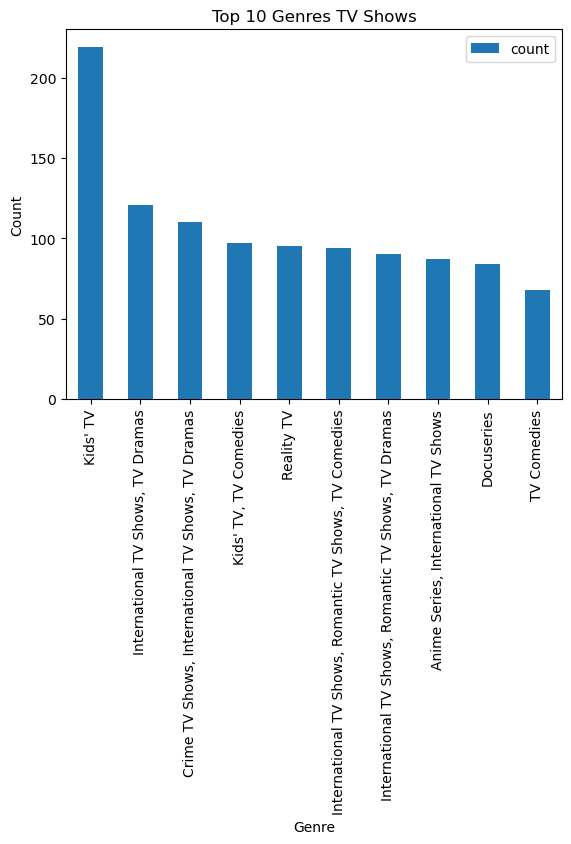

In [204]:
top10ListedGenresTvShow.plot(x='category', y='count', kind='bar')
plt.title('Top 10 Genres TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Conclusion and Feedback Invitation

This notebook has provided a comprehensive analysis of the Netflix dataset, exploring various aspects such as show types, content production by country, release year trends, ratings distribution, and genre popularity for both movies and TV shows.

I hope this analysis offers valuable insights and aids in better understanding of Netflix's content strategy and viewer preferences. If you have any suggestions for improvement, additional analyses, or corrections, please feel free to propose edits or reach out directly. Your feedback is highly appreciated as it helps enhance the quality and accuracy of this project.

Thank you for exploring this notebook!


## Connect With Me

Feel free to connect with me on my professional and social platforms to discuss more about data science and this analysis:

[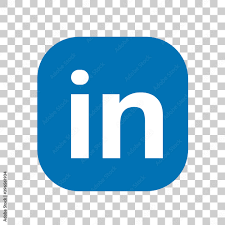](https://www.linkedin.com/in/abd-el-rahman-eldeeb-a9bab6251/) &nbsp;
[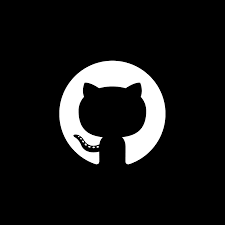](https://github.com/ElDEEB21) &nbsp;
[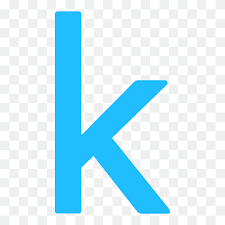](https://www.kaggle.com/abdoreldeeb)
